In [1]:
import numpy as np
import pandas as pd

In [6]:
data = pd.read_csv(r"Iris.csv")
data.drop(["Id", "Species"], axis=1, inplace=True)
data.drop_duplicates(inplace=True)

In [26]:
class KNN:
    '''使用Python使用K邻近算法。（回归预测）
    
    该算法用前三个属性寻找k个邻居，并根据k个邻居的第四个属性预测当前样本的第四个属性
    '''
    
    def __init__(self, k):
        '''初始化
        
        Parameters
        ----
        k:int
            邻居的个数
        '''
        self.k = k
        
    def fit(self, X, y):
        '''训练的方法
        
        Parameters
        ----
        X：类数组类型，形状为：[样本数量，特征的数量]
            待训练的样本特征
            
        y：类数组类型形状为：[样本数量]
            每个样本的目标值（标签）
        '''
        
        self.X = np.asarray(X)
        self.y = np.asarray(y)
        
    def predict(self, X):
        '''根据参数传递的样本，进而对样本数据进行预测
        
        Parameters:
        ----
        X：类数组类型，形状为：[样本数量，特征的数量]
            待训练的样本特征
            
        Returns
        -----
        result: 数组类型
            预测的结果
        '''
        X = np.asarray(X)
        result = []
        
        for x in X:
            # 计算距离
            dis = np.sqrt(np.sum((x - self.X) **2, axis=1))
            # 索引排序
            index = dis.argsort()
            index = index[:self.k]
            # 计算所有邻居节点距离的倒数之和
            s = np.sum( 1 / (dis[index] + 0.001) )
            # 使用每一个节点的倒数，除以倒数之和
            weight = 1 / (dis[index] + 0.001) / s
            # 使用邻居节点的标签值，乘以权重求和
            result.append(np.sum(self.y[index] *weight) )
            
        return np.asarray(result)

In [30]:
t = data.sample(len(data), random_state=0)
train_X = t.iloc[:120, :-1]
train_y = t.iloc[:120, -1]
test_X = t.iloc[120:, :-1]
test_y = t.iloc[120:, -1]

knn = KNN(k=3)
knn.fit(train_X, train_y)
result = knn.predict(test_X)

display(result)
display(test_y.values)
np.mean((result - test_y) ** 2)

array([1.35403914, 2.04006363, 1.15554454, 1.26331758, 2.19561371,
       1.16336566, 2.12379092, 0.36949954, 1.8875467 , 1.38365514,
       1.20794491, 0.17165102, 1.97672615, 2.23590685, 1.6765125 ,
       0.13817472, 1.02222047, 1.3       , 1.85536796, 1.23015903,
       0.17293278, 0.24368835, 0.17098366, 2.01556952, 1.1879292 ,
       1.82278521, 0.2       ])

array([1.5, 1.8, 1. , 1.3, 2.1, 1.2, 2.2, 0.2, 2.3, 1.3, 1. , 0.2, 1.6,
       2.1, 2.3, 0.3, 1. , 1.2, 1.5, 1.3, 0.2, 0.4, 0.1, 2.1, 1.1, 1.5,
       0.2])

0.0458106555834361

In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 设置中文显示
mpl.rcParams["font.family"] = "Droid Sans Fallback"
mpl.rcParams["axes.unicode_minus"] = False

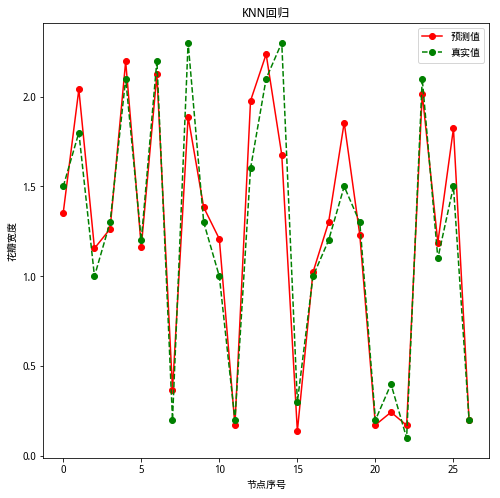

In [32]:
plt.figure(figsize=[8,8])
#绘制预测值
plt.plot(result, "ro-", label="预测值")
plt.plot(test_y.values, "go--", label="真实值")
plt.title("KNN回归")
plt.xlabel("节点序号")
plt.ylabel("花瓣宽度")
plt.legend()
plt.show()